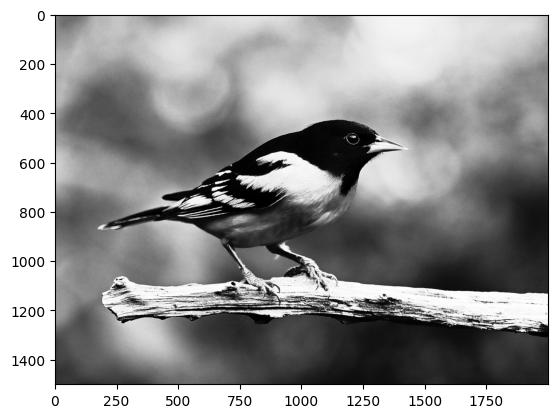

In [1]:
from PIL import Image
import math 
import scipy
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
im1 = np.asarray(img)
#convert 2D ndarray from 1D array
b1 = im1.flatten ()
#histogram and bin are computed
hist, bins = np.histogram (im1, 256, [0, 255]) 
#cumulative distribution function is computed
cdf = hist.cumsum()
#places where cdf=0 is masked or ignored and 
#rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)
#histogram equalization is performed 
num_cdf_m = (cdf_m -cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
# the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
# cdf values are assigned in the flattened array
im2 = cdf[b1]
#im2 is 1D so we use reshape command to
#make it into 2D
im3 = np.reshape(im2, im1.shape)
#converting im3 to an image
im4 = Image.fromarray(im3)
img.show()
im4.show()
plt.imshow(im4, cmap='gray')
plt.show()